In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/Session9')

In [3]:
from model import Net
from utils import (
   test,
   train,
   load_data,
   visualise_input,
   Cifar_10
)

from __future__ import print_function
import warnings
warnings.filterwarnings('ignore')
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
import numpy as np
import torchvision
import numpy as np
import matplotlib.pyplot as plt
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# from albumentations.pytorch import ToTensorV2
from torchvision import datasets, transforms, utils

In [4]:
SEED = 1
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
  torch.cuda.manual_seed(SEED)

CUDA Available? True


In [5]:
train_loader, test_loader = load_data()



100%|██████████| 170498071/170498071 [02:25<00:00, 1168029.84it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


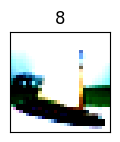

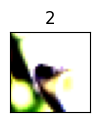

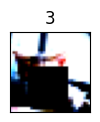

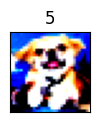

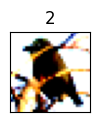

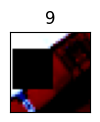

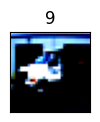

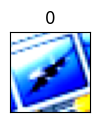

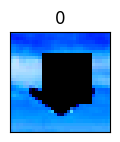

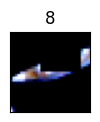

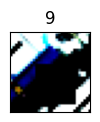

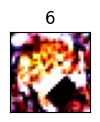

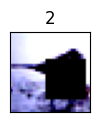

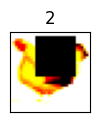

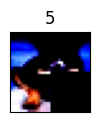

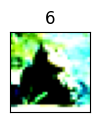

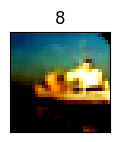

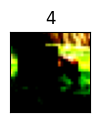

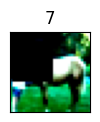

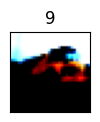

In [6]:
batch_data, batch_label = next(iter(train_loader))
# fig = plt.figure()
for i in range(20):
    plt.figure(figsize=(10,10))
    plt.subplot(3,8,i+1)
    plt.tight_layout()
    plt.imshow(np.transpose(batch_data[i], (1, 2, 0)), cmap='gray')

    plt.title(batch_label[i].item())
    plt.xticks([])
    plt.yticks([])
plt.show()

In [9]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

<class 'torch.utils.data.dataloader.DataLoader'>


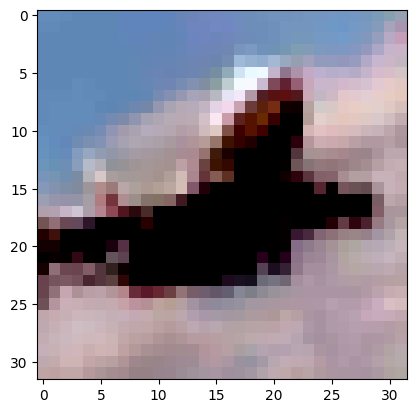

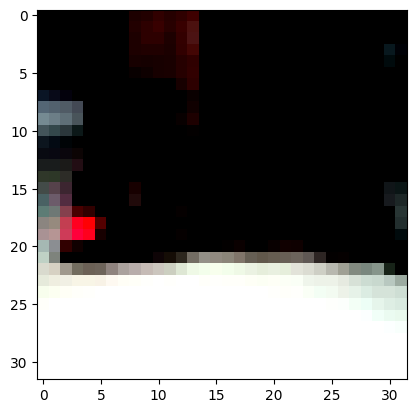

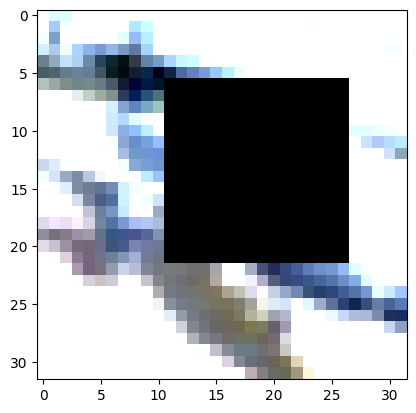

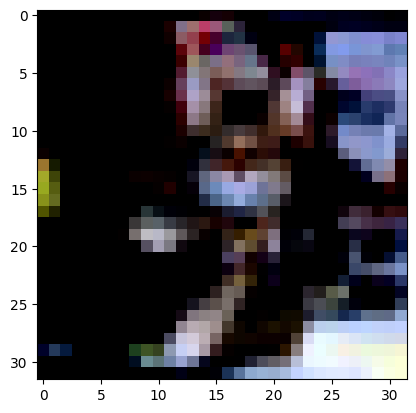

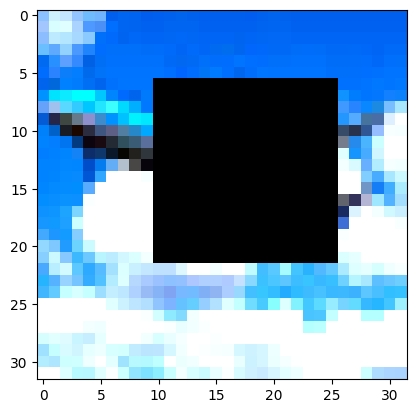

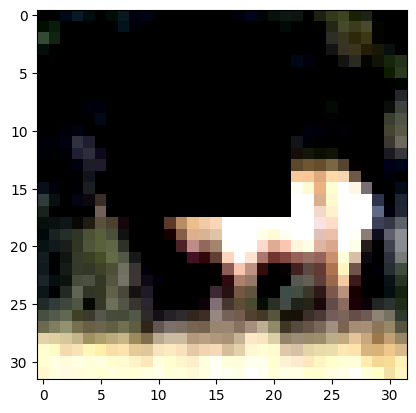

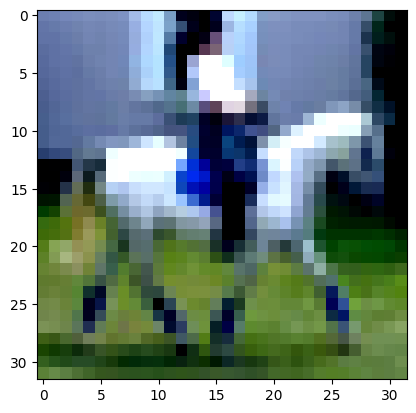

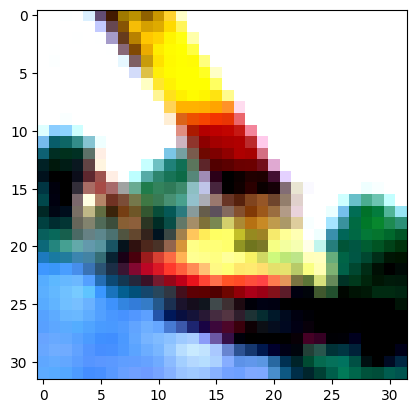

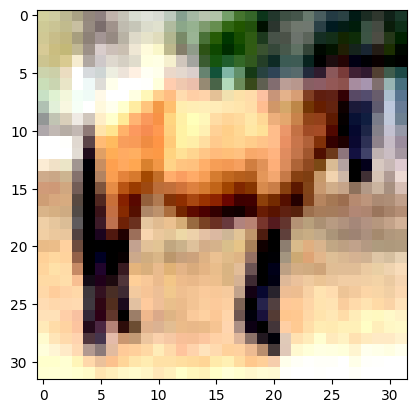

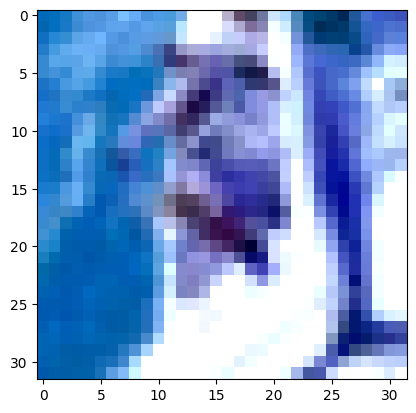

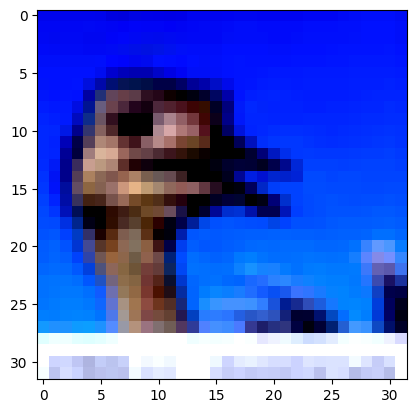

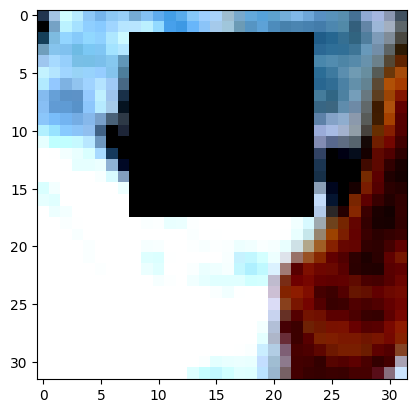

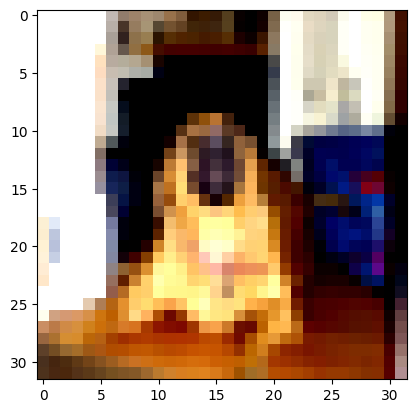

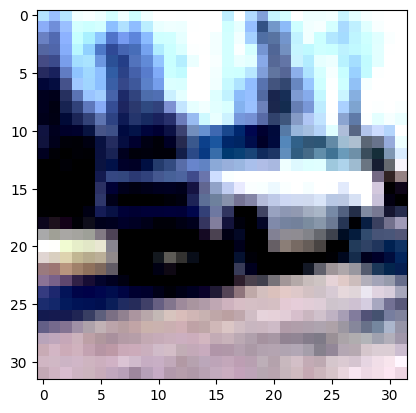

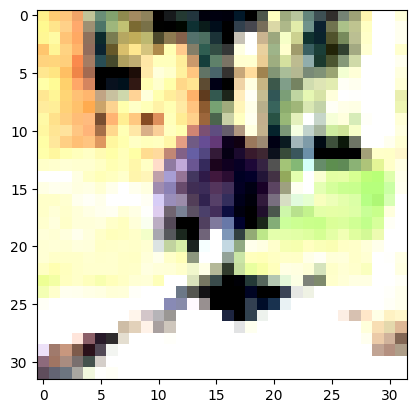

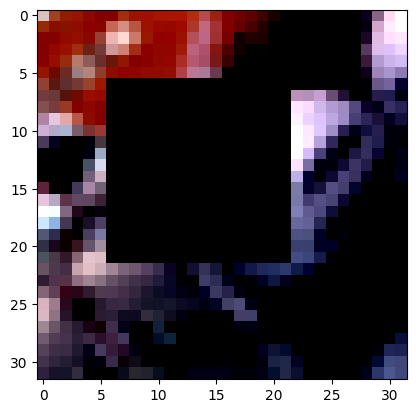

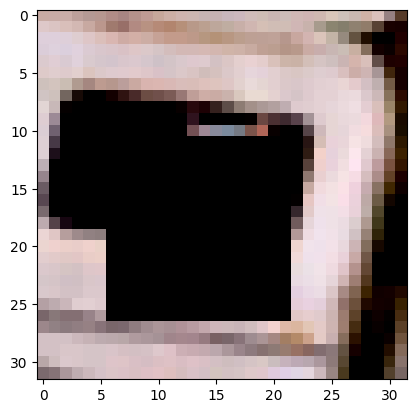

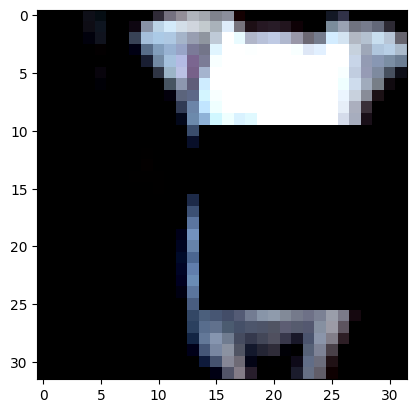

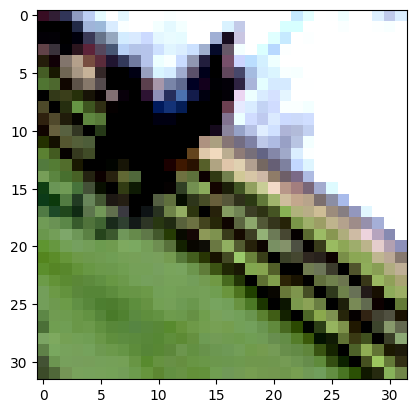

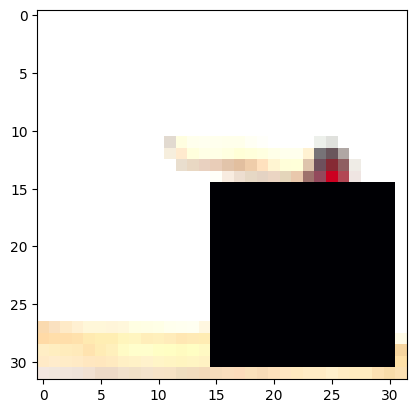

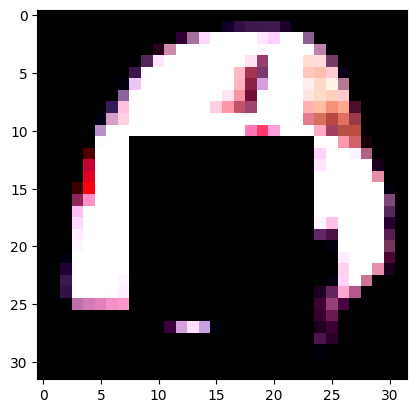

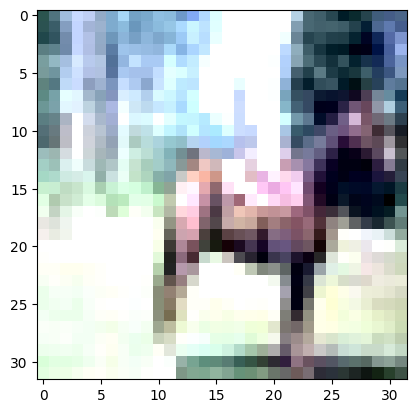

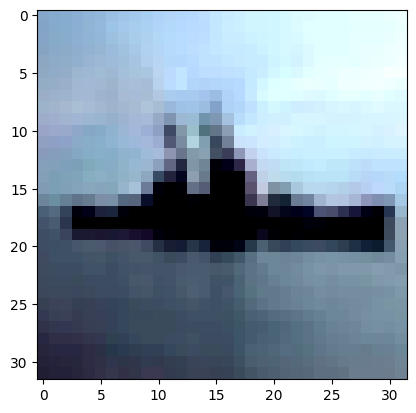

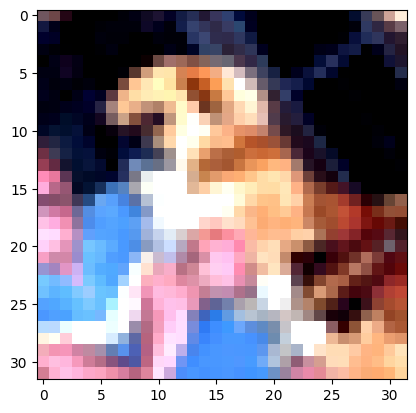

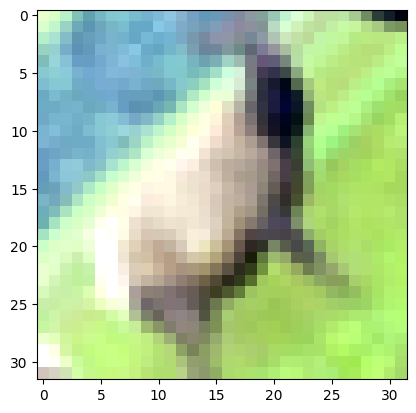

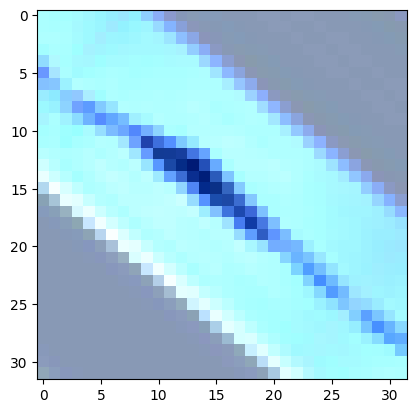

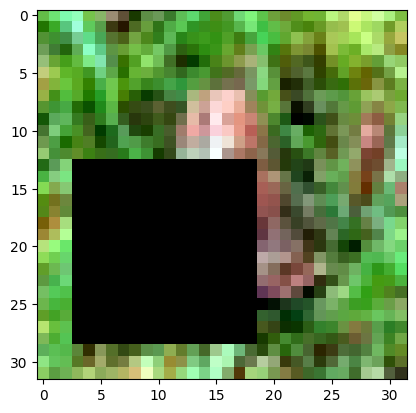

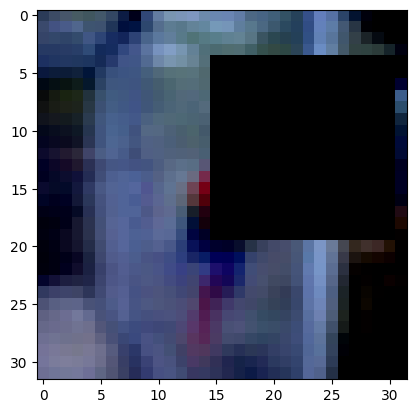

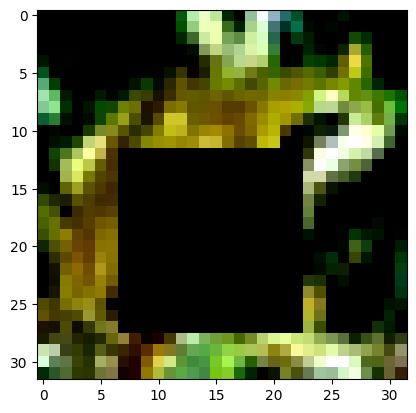

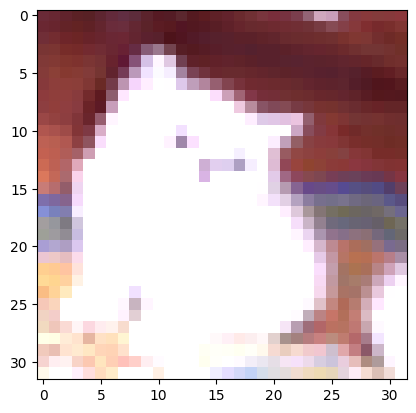

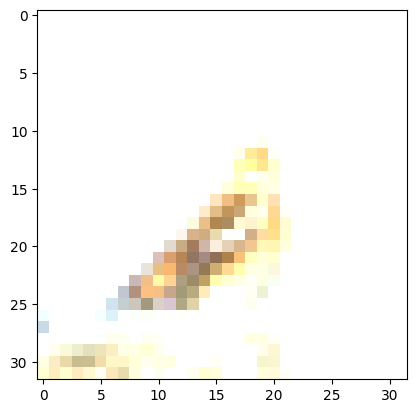

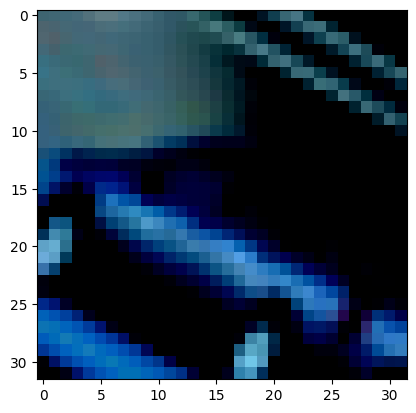

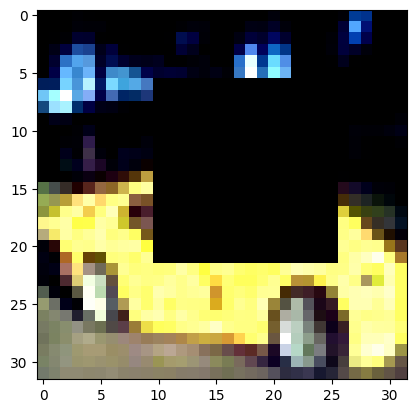

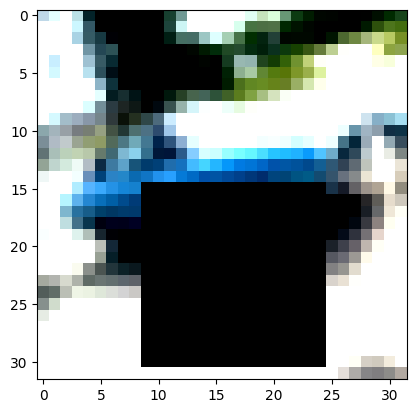

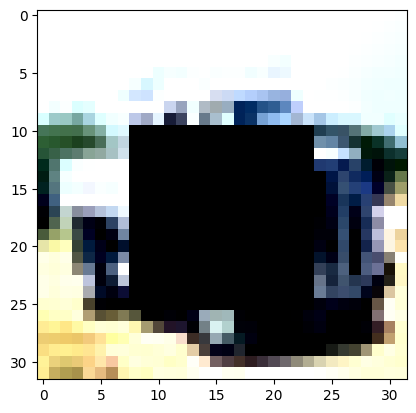

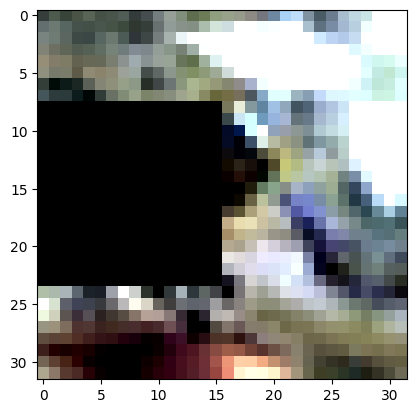

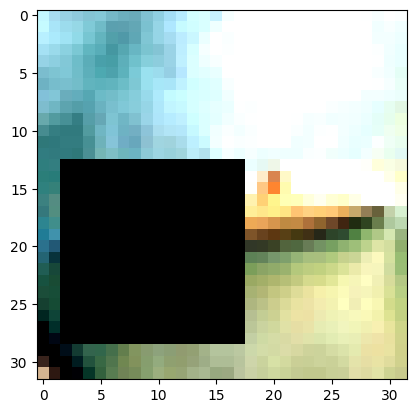

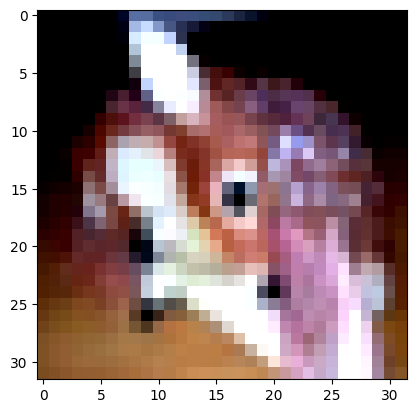

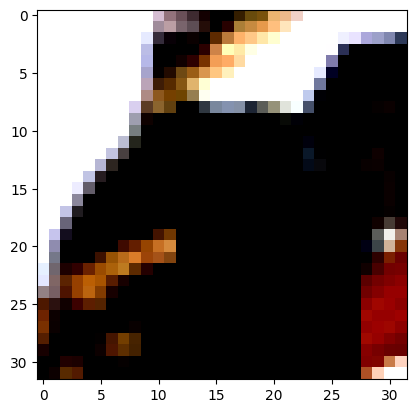

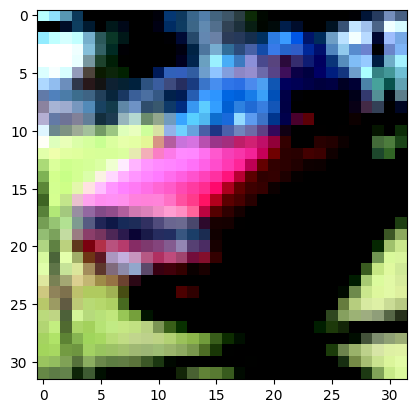

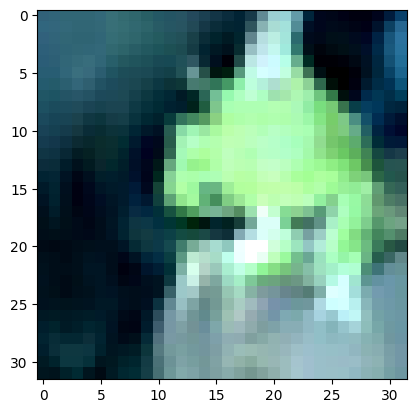

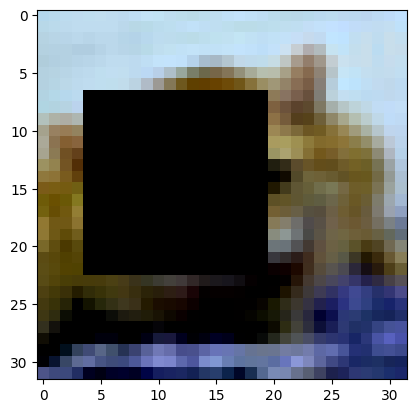

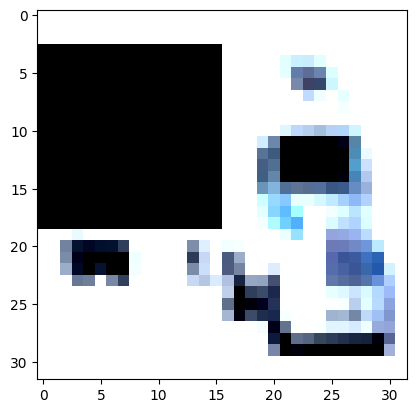

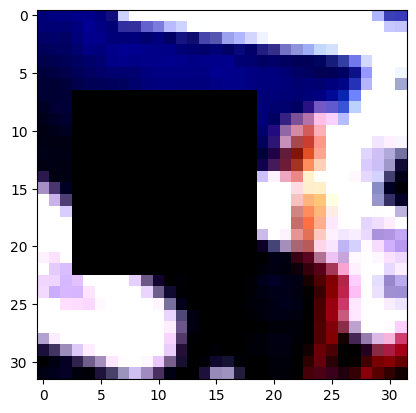

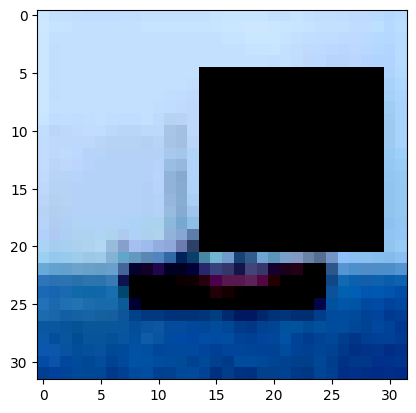

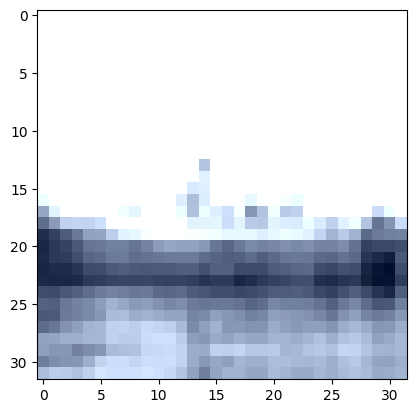

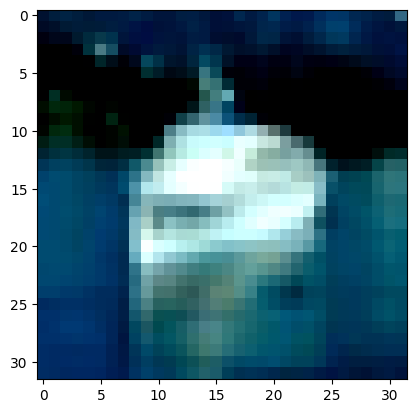

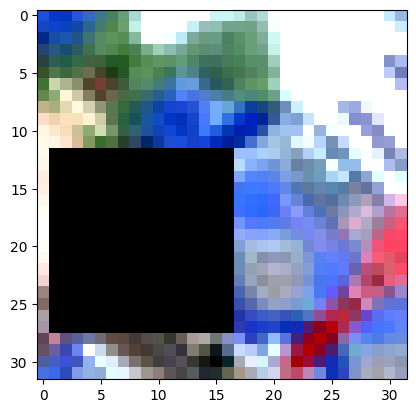

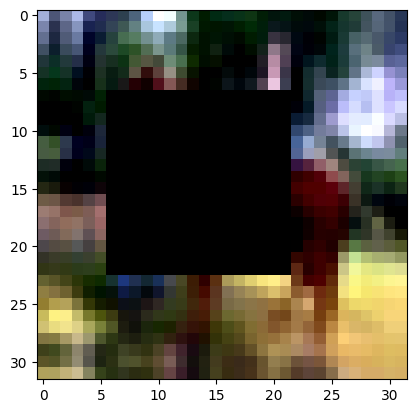

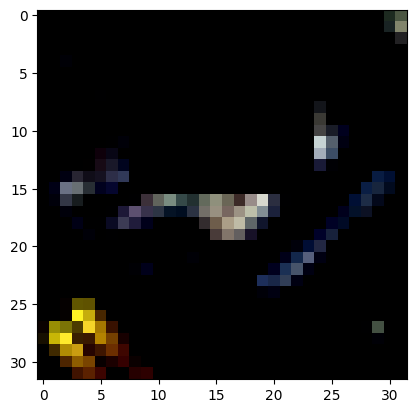

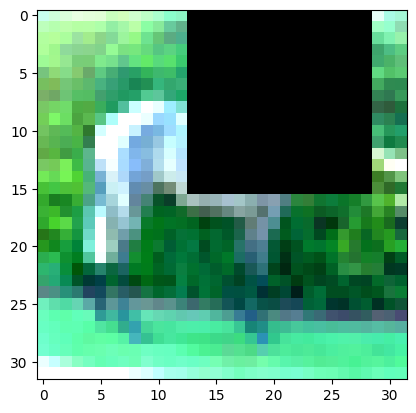

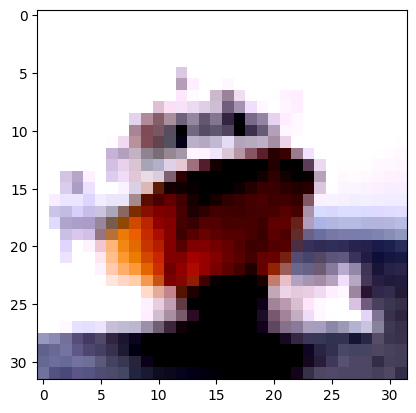

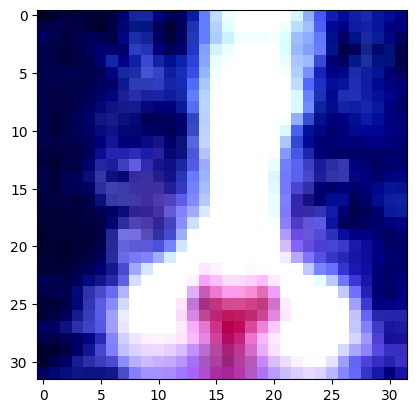

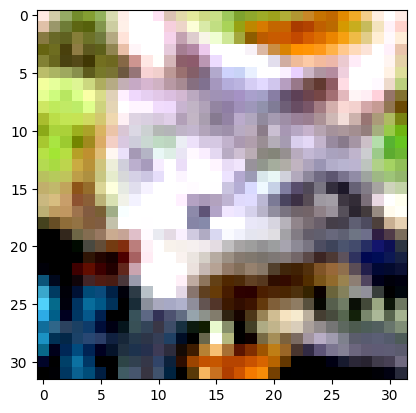

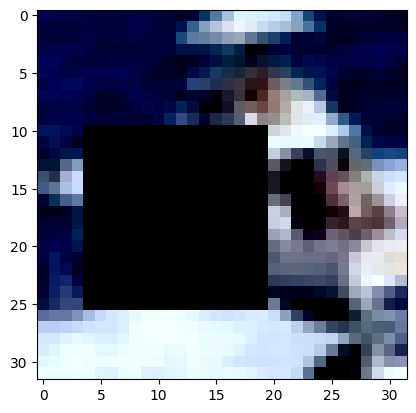

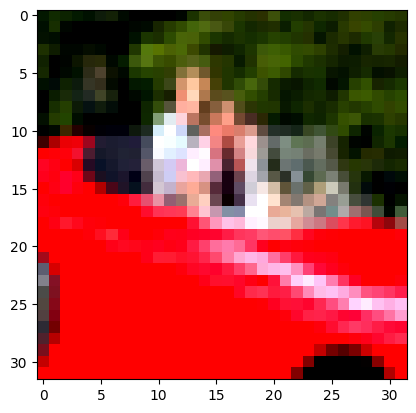

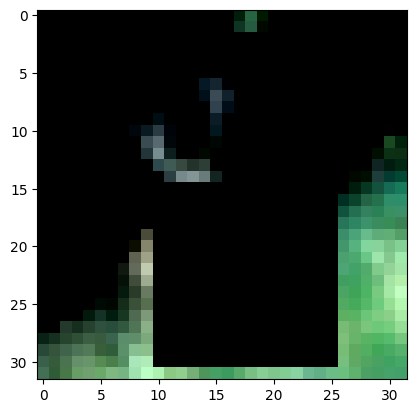

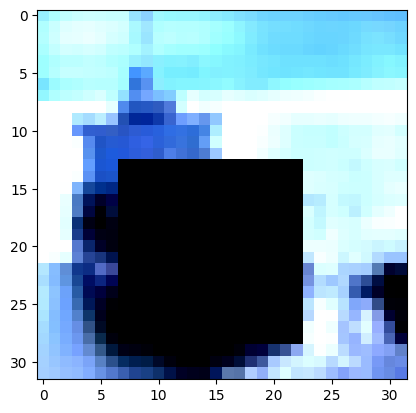

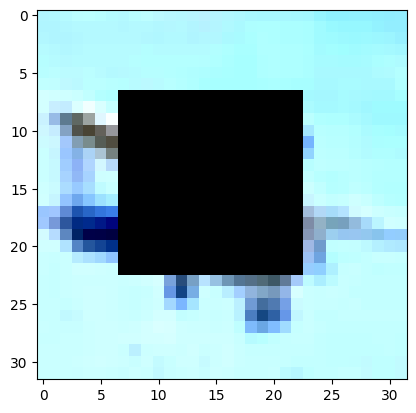

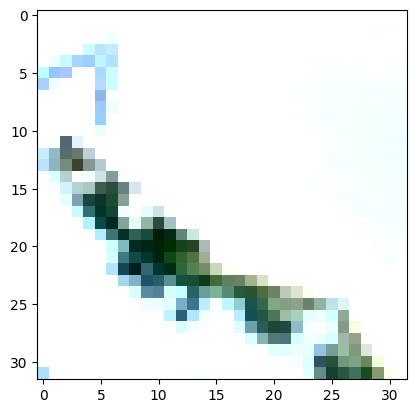

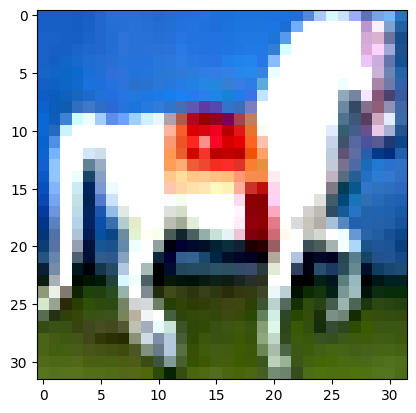

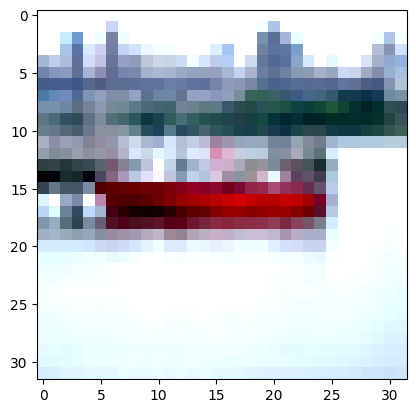

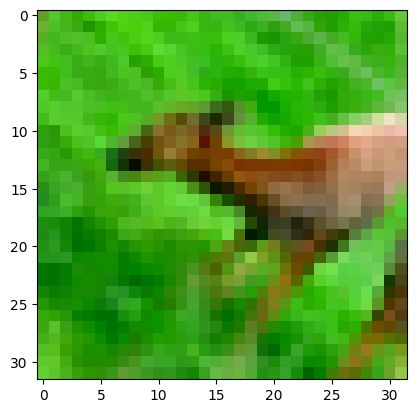

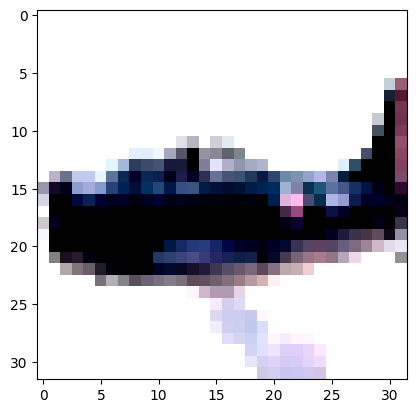

In [15]:
print(type(train_loader))
batch_size=28
#random sample from data from training images
dataiter = iter(train_loader)
# print(type(dataiter))
#dir(dataiter)
images, labels = next(dataiter)
# print(type(images))
# print(images.shape)
# print(type(labels))
for image in images:
  imshow(image)
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


In [16]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

print(cuda)
model_1 = Net().to(device)
summary(model_1, input_size=(3, 32, 32))

True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 32, 32]             270
              ReLU-2           [-1, 10, 32, 32]               0
       BatchNorm2d-3           [-1, 10, 32, 32]              20
           Dropout-4           [-1, 10, 32, 32]               0
            Conv2d-5           [-1, 24, 32, 32]           2,160
              ReLU-6           [-1, 24, 32, 32]               0
       BatchNorm2d-7           [-1, 24, 32, 32]              48
           Dropout-8           [-1, 24, 32, 32]               0
            Conv2d-9           [-1, 32, 30, 30]           6,912
           Conv2d-10           [-1, 64, 30, 30]          18,432
             ReLU-11           [-1, 64, 30, 30]               0
      BatchNorm2d-12           [-1, 64, 30, 30]             128
          Dropout-13           [-1, 64, 30, 30]               0
           Conv2d-14           [-1

In [17]:
train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []

optimizer = optim.SGD(model_1.parameters(), lr=0.01, momentum=0.9)


EPOCHS = 40
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_loss, train_acc = train(model_1, device, train_loader, optimizer, epoch)


    train_losses.append(train_loss)
    train_accuracy.append(train_acc)
    #scheduler.step()

    test_loss,test_accu = test(model_1, device, test_loader)
    test_losses.append(test_loss)
    test_accuracy.append(test_accu)

EPOCH: 0


Train: Loss=1.7553377151489258 Batch_id=781 Accuracy=25.61: 100%|██████████| 782/782 [00:21<00:00, 36.31it/s]



Test set: Average loss: 1.5324, Accuracy: 4105/10000 (41.05%)

EPOCH: 1


Train: Loss=1.5839979648590088 Batch_id=781 Accuracy=38.85: 100%|██████████| 782/782 [00:20<00:00, 38.85it/s]



Test set: Average loss: 1.4067, Accuracy: 4841/10000 (48.41%)

EPOCH: 2


Train: Loss=1.86875319480896 Batch_id=781 Accuracy=44.42: 100%|██████████| 782/782 [00:20<00:00, 38.95it/s]



Test set: Average loss: 1.2752, Accuracy: 5287/10000 (52.87%)

EPOCH: 3


Train: Loss=0.9151371121406555 Batch_id=781 Accuracy=47.73: 100%|██████████| 782/782 [00:22<00:00, 34.60it/s]



Test set: Average loss: 1.1974, Accuracy: 5697/10000 (56.97%)

EPOCH: 4


Train: Loss=1.6539899110794067 Batch_id=781 Accuracy=50.42: 100%|██████████| 782/782 [00:19<00:00, 39.50it/s]



Test set: Average loss: 1.0569, Accuracy: 6201/10000 (62.01%)

EPOCH: 5


Train: Loss=0.7392653226852417 Batch_id=781 Accuracy=52.11: 100%|██████████| 782/782 [00:21<00:00, 36.92it/s]



Test set: Average loss: 1.1479, Accuracy: 6041/10000 (60.41%)

EPOCH: 6


Train: Loss=1.4043495655059814 Batch_id=781 Accuracy=54.02: 100%|██████████| 782/782 [00:20<00:00, 38.85it/s]



Test set: Average loss: 1.0185, Accuracy: 6411/10000 (64.11%)

EPOCH: 7


Train: Loss=1.2558232545852661 Batch_id=781 Accuracy=55.16: 100%|██████████| 782/782 [00:23<00:00, 33.96it/s]



Test set: Average loss: 0.9758, Accuracy: 6530/10000 (65.30%)

EPOCH: 8


Train: Loss=1.464160680770874 Batch_id=781 Accuracy=56.17: 100%|██████████| 782/782 [00:21<00:00, 36.42it/s]



Test set: Average loss: 0.9684, Accuracy: 6567/10000 (65.67%)

EPOCH: 9


Train: Loss=1.4296592473983765 Batch_id=781 Accuracy=57.60: 100%|██████████| 782/782 [00:20<00:00, 38.56it/s]



Test set: Average loss: 0.9075, Accuracy: 6868/10000 (68.68%)

EPOCH: 10


Train: Loss=0.7860609889030457 Batch_id=781 Accuracy=58.54: 100%|██████████| 782/782 [00:21<00:00, 36.04it/s]



Test set: Average loss: 0.8691, Accuracy: 6936/10000 (69.36%)

EPOCH: 11


Train: Loss=1.0404878854751587 Batch_id=781 Accuracy=59.13: 100%|██████████| 782/782 [00:20<00:00, 37.82it/s]



Test set: Average loss: 0.8290, Accuracy: 7050/10000 (70.50%)

EPOCH: 12


Train: Loss=1.285238265991211 Batch_id=781 Accuracy=60.14: 100%|██████████| 782/782 [00:21<00:00, 36.22it/s]



Test set: Average loss: 0.8630, Accuracy: 7050/10000 (70.50%)

EPOCH: 13


Train: Loss=0.9157342910766602 Batch_id=781 Accuracy=60.92: 100%|██████████| 782/782 [00:20<00:00, 38.02it/s]



Test set: Average loss: 0.7914, Accuracy: 7241/10000 (72.41%)

EPOCH: 14


Train: Loss=1.0729185342788696 Batch_id=781 Accuracy=61.68: 100%|██████████| 782/782 [00:20<00:00, 38.34it/s]



Test set: Average loss: 0.7853, Accuracy: 7284/10000 (72.84%)

EPOCH: 15


Train: Loss=0.9323476552963257 Batch_id=781 Accuracy=62.16: 100%|██████████| 782/782 [00:21<00:00, 36.61it/s]



Test set: Average loss: 0.7924, Accuracy: 7274/10000 (72.74%)

EPOCH: 16


Train: Loss=0.8440093994140625 Batch_id=781 Accuracy=62.80: 100%|██████████| 782/782 [00:20<00:00, 37.49it/s]



Test set: Average loss: 0.7669, Accuracy: 7328/10000 (73.28%)

EPOCH: 17


Train: Loss=0.9230844974517822 Batch_id=781 Accuracy=63.42: 100%|██████████| 782/782 [00:21<00:00, 36.36it/s]



Test set: Average loss: 0.7270, Accuracy: 7474/10000 (74.74%)

EPOCH: 18


Train: Loss=1.2200217247009277 Batch_id=781 Accuracy=63.60: 100%|██████████| 782/782 [00:20<00:00, 37.78it/s]



Test set: Average loss: 0.7706, Accuracy: 7392/10000 (73.92%)

EPOCH: 19


Train: Loss=0.8611479997634888 Batch_id=781 Accuracy=63.92: 100%|██████████| 782/782 [00:20<00:00, 37.57it/s]



Test set: Average loss: 0.7414, Accuracy: 7452/10000 (74.52%)

EPOCH: 20


Train: Loss=0.8989599943161011 Batch_id=781 Accuracy=64.16: 100%|██████████| 782/782 [00:21<00:00, 36.55it/s]



Test set: Average loss: 0.6913, Accuracy: 7586/10000 (75.86%)

EPOCH: 21


Train: Loss=0.9038160443305969 Batch_id=781 Accuracy=64.73: 100%|██████████| 782/782 [00:20<00:00, 38.11it/s]



Test set: Average loss: 0.6879, Accuracy: 7601/10000 (76.01%)

EPOCH: 22


Train: Loss=1.3459817171096802 Batch_id=781 Accuracy=65.22: 100%|██████████| 782/782 [00:21<00:00, 36.13it/s]



Test set: Average loss: 0.6549, Accuracy: 7740/10000 (77.40%)

EPOCH: 23


Train: Loss=0.8414523601531982 Batch_id=781 Accuracy=65.19: 100%|██████████| 782/782 [00:20<00:00, 38.63it/s]



Test set: Average loss: 0.6689, Accuracy: 7705/10000 (77.05%)

EPOCH: 24


Train: Loss=1.5348403453826904 Batch_id=781 Accuracy=65.17: 100%|██████████| 782/782 [00:23<00:00, 33.52it/s]



Test set: Average loss: 0.6654, Accuracy: 7701/10000 (77.01%)

EPOCH: 25


Train: Loss=1.1043555736541748 Batch_id=781 Accuracy=65.77: 100%|██████████| 782/782 [00:20<00:00, 38.56it/s]



Test set: Average loss: 0.6513, Accuracy: 7733/10000 (77.33%)

EPOCH: 26


Train: Loss=1.1845587491989136 Batch_id=781 Accuracy=66.13: 100%|██████████| 782/782 [00:20<00:00, 37.32it/s]



Test set: Average loss: 0.6276, Accuracy: 7852/10000 (78.52%)

EPOCH: 27


Train: Loss=1.365710973739624 Batch_id=781 Accuracy=66.27: 100%|██████████| 782/782 [00:21<00:00, 35.77it/s]



Test set: Average loss: 0.6382, Accuracy: 7781/10000 (77.81%)

EPOCH: 28


Train: Loss=1.0455718040466309 Batch_id=781 Accuracy=66.40: 100%|██████████| 782/782 [00:20<00:00, 38.93it/s]



Test set: Average loss: 0.6228, Accuracy: 7825/10000 (78.25%)

EPOCH: 29


Train: Loss=1.1478736400604248 Batch_id=781 Accuracy=66.85: 100%|██████████| 782/782 [00:21<00:00, 37.07it/s]



Test set: Average loss: 0.6256, Accuracy: 7822/10000 (78.22%)

EPOCH: 30


Train: Loss=1.316382884979248 Batch_id=781 Accuracy=66.88: 100%|██████████| 782/782 [00:19<00:00, 39.51it/s]



Test set: Average loss: 0.6293, Accuracy: 7831/10000 (78.31%)

EPOCH: 31


Train: Loss=0.8504398465156555 Batch_id=781 Accuracy=67.21: 100%|██████████| 782/782 [00:21<00:00, 36.68it/s]



Test set: Average loss: 0.6266, Accuracy: 7789/10000 (77.89%)

EPOCH: 32


Train: Loss=1.1031192541122437 Batch_id=781 Accuracy=67.29: 100%|██████████| 782/782 [00:22<00:00, 34.76it/s]



Test set: Average loss: 0.6358, Accuracy: 7850/10000 (78.50%)

EPOCH: 33


Train: Loss=0.41392582654953003 Batch_id=781 Accuracy=67.49: 100%|██████████| 782/782 [00:20<00:00, 39.08it/s]



Test set: Average loss: 0.6328, Accuracy: 7874/10000 (78.74%)

EPOCH: 34


Train: Loss=0.6528039574623108 Batch_id=781 Accuracy=67.50: 100%|██████████| 782/782 [00:21<00:00, 36.66it/s]



Test set: Average loss: 0.5945, Accuracy: 7929/10000 (79.29%)

EPOCH: 35


Train: Loss=0.8108538389205933 Batch_id=781 Accuracy=67.72: 100%|██████████| 782/782 [00:20<00:00, 38.76it/s]



Test set: Average loss: 0.5950, Accuracy: 7941/10000 (79.41%)

EPOCH: 36


Train: Loss=0.7784727811813354 Batch_id=781 Accuracy=67.83: 100%|██████████| 782/782 [00:21<00:00, 36.42it/s]



Test set: Average loss: 0.5681, Accuracy: 8037/10000 (80.37%)

EPOCH: 37


Train: Loss=0.9550485014915466 Batch_id=781 Accuracy=67.85: 100%|██████████| 782/782 [00:20<00:00, 38.42it/s]



Test set: Average loss: 0.5716, Accuracy: 8029/10000 (80.29%)

EPOCH: 38


Train: Loss=0.6138175129890442 Batch_id=781 Accuracy=68.07: 100%|██████████| 782/782 [00:21<00:00, 36.30it/s]



Test set: Average loss: 0.5945, Accuracy: 7942/10000 (79.42%)

EPOCH: 39


Train: Loss=0.4760848581790924 Batch_id=781 Accuracy=68.35: 100%|██████████| 782/782 [00:20<00:00, 38.55it/s]



Test set: Average loss: 0.5643, Accuracy: 8048/10000 (80.48%)



In [18]:
EPOCHS = 30
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_loss, train_acc = train(model_1, device, train_loader, optimizer, epoch)
    print(f'train_acc: {train_acc},train_loss: {train_loss} ')
    # print(f'train_loss.shape{train_loss.shape}')

    train_losses.append(train_loss)
    train_accuracy.append(train_acc)
    #scheduler.step()

    test_loss,test_accu = test(model_1, device, test_loader)
    test_losses.append(test_loss)
    test_accuracy.append(test_accu)

EPOCH: 0


Train: Loss=1.3320410251617432 Batch_id=781 Accuracy=68.23: 100%|██████████| 782/782 [00:19<00:00, 39.59it/s]

train_acc: 68.23,train_loss: 0.9076489713185888 



Test set: Average loss: 0.5796, Accuracy: 7982/10000 (79.82%)

EPOCH: 1


Train: Loss=1.0474333763122559 Batch_id=781 Accuracy=68.49: 100%|██████████| 782/782 [00:21<00:00, 37.17it/s]

train_acc: 68.488,train_loss: 0.8978005613359954 



Test set: Average loss: 0.5442, Accuracy: 8131/10000 (81.31%)

EPOCH: 2


Train: Loss=0.7772670388221741 Batch_id=781 Accuracy=68.39: 100%|██████████| 782/782 [00:21<00:00, 36.57it/s]

train_acc: 68.386,train_loss: 0.8978877898372347 



Test set: Average loss: 0.5725, Accuracy: 8031/10000 (80.31%)

EPOCH: 3


Train: Loss=0.870098888874054 Batch_id=781 Accuracy=68.92: 100%|██████████| 782/782 [00:20<00:00, 37.33it/s]

train_acc: 68.916,train_loss: 0.8895238262917989 



Test set: Average loss: 0.5729, Accuracy: 8018/10000 (80.18%)

EPOCH: 4


Train: Loss=0.8925332427024841 Batch_id=781 Accuracy=68.92: 100%|██████████| 782/782 [00:19<00:00, 39.70it/s]

train_acc: 68.92,train_loss: 0.8888958037052008 



Test set: Average loss: 0.5453, Accuracy: 8119/10000 (81.19%)

EPOCH: 5


Train: Loss=0.7855976223945618 Batch_id=781 Accuracy=69.16: 100%|██████████| 782/782 [00:20<00:00, 38.24it/s]

train_acc: 69.162,train_loss: 0.8790957437604284 



Test set: Average loss: 0.5943, Accuracy: 7984/10000 (79.84%)

EPOCH: 6


Train: Loss=1.3768558502197266 Batch_id=781 Accuracy=69.10: 100%|██████████| 782/782 [00:19<00:00, 40.12it/s]

train_acc: 69.104,train_loss: 0.8798864399990463 



Test set: Average loss: 0.5512, Accuracy: 8140/10000 (81.40%)

EPOCH: 7


Train: Loss=0.8164046406745911 Batch_id=781 Accuracy=68.95: 100%|██████████| 782/782 [00:20<00:00, 38.82it/s]

train_acc: 68.95,train_loss: 0.8785138326075376 



Test set: Average loss: 0.5498, Accuracy: 8104/10000 (81.04%)

EPOCH: 8


Train: Loss=0.8683633804321289 Batch_id=781 Accuracy=69.60: 100%|██████████| 782/782 [00:20<00:00, 38.49it/s]

train_acc: 69.598,train_loss: 0.8725367520776246 



Test set: Average loss: 0.5617, Accuracy: 8073/10000 (80.73%)

EPOCH: 9


Train: Loss=0.9087238311767578 Batch_id=781 Accuracy=69.62: 100%|██████████| 782/782 [00:19<00:00, 40.13it/s]

train_acc: 69.618,train_loss: 0.8693826617792134 



Test set: Average loss: 0.5580, Accuracy: 8111/10000 (81.11%)

EPOCH: 10


Train: Loss=0.9866821765899658 Batch_id=781 Accuracy=69.28: 100%|██████████| 782/782 [00:21<00:00, 36.80it/s]

train_acc: 69.284,train_loss: 0.8773041555033926 



Test set: Average loss: 0.5618, Accuracy: 8072/10000 (80.72%)

EPOCH: 11


Train: Loss=0.8178467750549316 Batch_id=781 Accuracy=69.34: 100%|██████████| 782/782 [00:19<00:00, 39.63it/s]

train_acc: 69.344,train_loss: 0.8656676172295494 



Test set: Average loss: 0.5443, Accuracy: 8147/10000 (81.47%)

EPOCH: 12


Train: Loss=1.1898133754730225 Batch_id=781 Accuracy=69.79: 100%|██████████| 782/782 [00:21<00:00, 36.87it/s]

train_acc: 69.794,train_loss: 0.8675397513315196 



Test set: Average loss: 0.5551, Accuracy: 8110/10000 (81.10%)

EPOCH: 13


Train: Loss=0.5805668234825134 Batch_id=781 Accuracy=69.95: 100%|██████████| 782/782 [00:19<00:00, 39.39it/s]

train_acc: 69.952,train_loss: 0.8571336054817185 



Test set: Average loss: 0.5222, Accuracy: 8175/10000 (81.75%)

EPOCH: 14


Train: Loss=1.0629717111587524 Batch_id=781 Accuracy=69.92: 100%|██████████| 782/782 [00:20<00:00, 37.61it/s]

train_acc: 69.92,train_loss: 0.8568451241459079 



Test set: Average loss: 0.5322, Accuracy: 8180/10000 (81.80%)

EPOCH: 15


Train: Loss=0.49524176120758057 Batch_id=781 Accuracy=69.72: 100%|██████████| 782/782 [00:19<00:00, 39.37it/s]

train_acc: 69.724,train_loss: 0.8625481068478216 



Test set: Average loss: 0.5451, Accuracy: 8138/10000 (81.38%)

EPOCH: 16


Train: Loss=1.3300764560699463 Batch_id=781 Accuracy=69.90: 100%|██████████| 782/782 [00:21<00:00, 36.95it/s]

train_acc: 69.898,train_loss: 0.8624634186325171 



Test set: Average loss: 0.5670, Accuracy: 8064/10000 (80.64%)

EPOCH: 17


Train: Loss=0.8081046342849731 Batch_id=781 Accuracy=70.01: 100%|██████████| 782/782 [00:19<00:00, 39.59it/s]

train_acc: 70.006,train_loss: 0.8552948163293511 



Test set: Average loss: 0.5666, Accuracy: 8105/10000 (81.05%)

EPOCH: 18


Train: Loss=0.8367985486984253 Batch_id=781 Accuracy=70.05: 100%|██████████| 782/782 [00:20<00:00, 37.51it/s]

train_acc: 70.054,train_loss: 0.8560142834549365 



Test set: Average loss: 0.5246, Accuracy: 8210/10000 (82.10%)

EPOCH: 19


Train: Loss=1.6830402612686157 Batch_id=781 Accuracy=69.94: 100%|██████████| 782/782 [00:21<00:00, 36.83it/s]

train_acc: 69.944,train_loss: 0.8518559076368352 



Test set: Average loss: 0.5081, Accuracy: 8249/10000 (82.49%)

EPOCH: 20


Train: Loss=0.7607384324073792 Batch_id=781 Accuracy=69.92: 100%|██████████| 782/782 [00:21<00:00, 36.08it/s]

train_acc: 69.918,train_loss: 0.8564779955865173 



Test set: Average loss: 0.5322, Accuracy: 8175/10000 (81.75%)

EPOCH: 21


Train: Loss=0.6726760268211365 Batch_id=781 Accuracy=70.19: 100%|██████████| 782/782 [00:20<00:00, 38.40it/s]

train_acc: 70.186,train_loss: 0.8478483299312689 



Test set: Average loss: 0.5233, Accuracy: 8196/10000 (81.96%)

EPOCH: 22


Train: Loss=0.7938231229782104 Batch_id=781 Accuracy=70.22: 100%|██████████| 782/782 [00:20<00:00, 37.67it/s]

train_acc: 70.224,train_loss: 0.85161848610167 



Test set: Average loss: 0.5159, Accuracy: 8221/10000 (82.21%)

EPOCH: 23


Train: Loss=0.5932875275611877 Batch_id=781 Accuracy=70.29: 100%|██████████| 782/782 [00:22<00:00, 35.34it/s]

train_acc: 70.292,train_loss: 0.8443921166460228 



Test set: Average loss: 0.5498, Accuracy: 8124/10000 (81.24%)

EPOCH: 24


Train: Loss=1.1256182193756104 Batch_id=781 Accuracy=70.57: 100%|██████████| 782/782 [00:19<00:00, 39.30it/s]

train_acc: 70.566,train_loss: 0.8396981395495212 



Test set: Average loss: 0.5139, Accuracy: 8234/10000 (82.34%)

EPOCH: 25


Train: Loss=0.4041510224342346 Batch_id=781 Accuracy=70.56: 100%|██████████| 782/782 [00:21<00:00, 36.64it/s]

train_acc: 70.562,train_loss: 0.8425139429624123 



Test set: Average loss: 0.5247, Accuracy: 8220/10000 (82.20%)

EPOCH: 26


Train: Loss=0.8298056721687317 Batch_id=781 Accuracy=70.74: 100%|██████████| 782/782 [00:20<00:00, 39.08it/s]

train_acc: 70.74,train_loss: 0.8400166298803466 



Test set: Average loss: 0.5089, Accuracy: 8281/10000 (82.81%)

EPOCH: 27


Train: Loss=0.7958367466926575 Batch_id=781 Accuracy=70.77: 100%|██████████| 782/782 [00:22<00:00, 34.30it/s]

train_acc: 70.768,train_loss: 0.8358095299328685 



Test set: Average loss: 0.5103, Accuracy: 8207/10000 (82.07%)

EPOCH: 28


Train: Loss=0.5849976539611816 Batch_id=781 Accuracy=70.54: 100%|██████████| 782/782 [00:19<00:00, 39.27it/s]

train_acc: 70.54,train_loss: 0.8354179212047012 



Test set: Average loss: 0.5237, Accuracy: 8235/10000 (82.35%)

EPOCH: 29


Train: Loss=0.4169027805328369 Batch_id=781 Accuracy=70.98: 100%|██████████| 782/782 [00:21<00:00, 36.74it/s]

train_acc: 70.98,train_loss: 0.8332920286737745 



Test set: Average loss: 0.4991, Accuracy: 8286/10000 (82.86%)



In [19]:
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_loss, train_acc = train(model_1, device, train_loader, optimizer, epoch)
    print(f'train_acc: {train_acc},train_loss: {train_loss} ')
    # print(f'train_loss.shape{train_loss.shape}')

    train_losses.append(train_loss)
    train_accuracy.append(train_acc)
    #scheduler.step()

    test_loss,test_accu = test(model_1, device, test_loader)
    test_losses.append(test_loss)
    test_accuracy.append(test_accu)

EPOCH: 0


Train: Loss=0.7047526836395264 Batch_id=781 Accuracy=70.94: 100%|██████████| 782/782 [00:20<00:00, 38.11it/s]

train_acc: 70.938,train_loss: 0.8335545717755242 



Test set: Average loss: 0.4919, Accuracy: 8329/10000 (83.29%)

EPOCH: 1


Train: Loss=1.8263576030731201 Batch_id=781 Accuracy=70.89: 100%|██████████| 782/782 [00:19<00:00, 40.27it/s]

train_acc: 70.888,train_loss: 0.8315270050712253 



Test set: Average loss: 0.5213, Accuracy: 8214/10000 (82.14%)

EPOCH: 2


Train: Loss=1.2249433994293213 Batch_id=781 Accuracy=70.86: 100%|██████████| 782/782 [00:20<00:00, 39.06it/s]

train_acc: 70.856,train_loss: 0.8322379869573256 



Test set: Average loss: 0.5095, Accuracy: 8240/10000 (82.40%)

EPOCH: 3


Train: Loss=0.9068230390548706 Batch_id=781 Accuracy=70.92: 100%|██████████| 782/782 [00:19<00:00, 40.37it/s]


train_acc: 70.916,train_loss: 0.8266822064243009 

Test set: Average loss: 0.5142, Accuracy: 8268/10000 (82.68%)

EPOCH: 4


Train: Loss=0.8935667872428894 Batch_id=781 Accuracy=70.81: 100%|██████████| 782/782 [00:20<00:00, 38.89it/s]

train_acc: 70.812,train_loss: 0.8298033704919279 



Test set: Average loss: 0.5140, Accuracy: 8241/10000 (82.41%)

EPOCH: 5


Train: Loss=0.946537435054779 Batch_id=781 Accuracy=71.12: 100%|██████████| 782/782 [00:22<00:00, 35.12it/s]

train_acc: 71.124,train_loss: 0.82626591283647 



Test set: Average loss: 0.5078, Accuracy: 8295/10000 (82.95%)

EPOCH: 6


Train: Loss=0.9844980835914612 Batch_id=781 Accuracy=71.26: 100%|██████████| 782/782 [00:19<00:00, 40.72it/s]

train_acc: 71.258,train_loss: 0.8192876225618451 



Test set: Average loss: 0.4932, Accuracy: 8309/10000 (83.09%)

EPOCH: 7


Train: Loss=0.6882501244544983 Batch_id=781 Accuracy=71.48: 100%|██████████| 782/782 [00:20<00:00, 37.95it/s]

train_acc: 71.48,train_loss: 0.8208666361125229 



Test set: Average loss: 0.4876, Accuracy: 8321/10000 (83.21%)

EPOCH: 8


Train: Loss=1.1528011560440063 Batch_id=781 Accuracy=71.25: 100%|██████████| 782/782 [00:20<00:00, 38.91it/s]

train_acc: 71.246,train_loss: 0.8222033616222079 



Test set: Average loss: 0.5111, Accuracy: 8262/10000 (82.62%)

EPOCH: 9


Train: Loss=0.8391059041023254 Batch_id=781 Accuracy=71.25: 100%|██████████| 782/782 [00:21<00:00, 36.83it/s]

train_acc: 71.252,train_loss: 0.8197973562628412 



Test set: Average loss: 0.4864, Accuracy: 8344/10000 (83.44%)

EPOCH: 10


Train: Loss=0.6210828423500061 Batch_id=781 Accuracy=71.50: 100%|██████████| 782/782 [00:20<00:00, 38.98it/s]

train_acc: 71.502,train_loss: 0.8184137037952842 



Test set: Average loss: 0.4938, Accuracy: 8334/10000 (83.34%)

EPOCH: 11


Train: Loss=0.6591528654098511 Batch_id=781 Accuracy=71.33: 100%|██████████| 782/782 [00:20<00:00, 37.93it/s]

train_acc: 71.334,train_loss: 0.8173508417728307 



Test set: Average loss: 0.5038, Accuracy: 8296/10000 (82.96%)

EPOCH: 12


Train: Loss=0.47347399592399597 Batch_id=781 Accuracy=71.22: 100%|██████████| 782/782 [00:19<00:00, 39.86it/s]

train_acc: 71.224,train_loss: 0.8192452032242894 



Test set: Average loss: 0.4971, Accuracy: 8302/10000 (83.02%)

EPOCH: 13


Train: Loss=0.8398759961128235 Batch_id=781 Accuracy=71.27: 100%|██████████| 782/782 [00:21<00:00, 36.79it/s]

train_acc: 71.268,train_loss: 0.8162634486280134 



Test set: Average loss: 0.5129, Accuracy: 8259/10000 (82.59%)

EPOCH: 14


Train: Loss=0.824578046798706 Batch_id=781 Accuracy=71.44: 100%|██████████| 782/782 [00:20<00:00, 38.79it/s]

train_acc: 71.438,train_loss: 0.8211326316723129 



Test set: Average loss: 0.5090, Accuracy: 8282/10000 (82.82%)



In [20]:
EPOCHS = 30
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_loss, train_acc = train(model_1, device, train_loader, optimizer, epoch)
    print(f'train_acc: {train_acc},train_loss: {train_loss} ')
    # print(f'train_loss.shape{train_loss.shape}')

    train_losses.append(train_loss)
    train_accuracy.append(train_acc)
    #scheduler.step()

    test_loss,test_accu = test(model_1, device, test_loader)
    test_losses.append(test_loss)
    test_accuracy.append(test_accu)

EPOCH: 0


Train: Loss=0.6551604270935059 Batch_id=781 Accuracy=71.54: 100%|██████████| 782/782 [00:19<00:00, 40.08it/s]

train_acc: 71.544,train_loss: 0.8089671550351946 



Test set: Average loss: 0.4865, Accuracy: 8311/10000 (83.11%)

EPOCH: 1


Train: Loss=0.8123995065689087 Batch_id=781 Accuracy=71.46: 100%|██████████| 782/782 [00:20<00:00, 38.75it/s]

train_acc: 71.462,train_loss: 0.8090013162711697 



Test set: Average loss: 0.4945, Accuracy: 8322/10000 (83.22%)

EPOCH: 2


Train: Loss=0.7421647310256958 Batch_id=781 Accuracy=71.54: 100%|██████████| 782/782 [00:19<00:00, 40.12it/s]

train_acc: 71.536,train_loss: 0.8093430402943546 



Test set: Average loss: 0.4980, Accuracy: 8315/10000 (83.15%)

EPOCH: 3


Train: Loss=0.7621030807495117 Batch_id=781 Accuracy=71.94: 100%|██████████| 782/782 [00:20<00:00, 37.45it/s]


train_acc: 71.942,train_loss: 0.8031418647455133 

Test set: Average loss: 0.5011, Accuracy: 8283/10000 (82.83%)

EPOCH: 4


Train: Loss=0.6106514930725098 Batch_id=781 Accuracy=71.91: 100%|██████████| 782/782 [00:19<00:00, 40.71it/s]

train_acc: 71.914,train_loss: 0.8013848447052719 



Test set: Average loss: 0.5003, Accuracy: 8277/10000 (82.77%)

EPOCH: 5


Train: Loss=1.1164946556091309 Batch_id=781 Accuracy=71.77: 100%|██████████| 782/782 [00:20<00:00, 38.00it/s]

train_acc: 71.774,train_loss: 0.8075176768214501 



Test set: Average loss: 0.4965, Accuracy: 8323/10000 (83.23%)

EPOCH: 6


Train: Loss=0.5440119504928589 Batch_id=781 Accuracy=71.72: 100%|██████████| 782/782 [00:19<00:00, 40.83it/s]

train_acc: 71.722,train_loss: 0.803359357101838 



Test set: Average loss: 0.4769, Accuracy: 8399/10000 (83.99%)

EPOCH: 7


Train: Loss=0.9176978468894958 Batch_id=781 Accuracy=71.88: 100%|██████████| 782/782 [00:21<00:00, 35.64it/s]

train_acc: 71.878,train_loss: 0.8067607259201577 



Test set: Average loss: 0.4937, Accuracy: 8323/10000 (83.23%)

EPOCH: 8


Train: Loss=1.02181875705719 Batch_id=781 Accuracy=71.82: 100%|██████████| 782/782 [00:19<00:00, 40.16it/s]

train_acc: 71.822,train_loss: 0.7987015117769656 



Test set: Average loss: 0.4761, Accuracy: 8367/10000 (83.67%)

EPOCH: 9


Train: Loss=1.3593813180923462 Batch_id=781 Accuracy=71.96: 100%|██████████| 782/782 [00:20<00:00, 37.63it/s]


train_acc: 71.958,train_loss: 0.8014441126828913 

Test set: Average loss: 0.4877, Accuracy: 8342/10000 (83.42%)

EPOCH: 10


Train: Loss=0.49541202187538147 Batch_id=781 Accuracy=71.63: 100%|██████████| 782/782 [00:19<00:00, 40.52it/s]

train_acc: 71.634,train_loss: 0.8023414736056267 



Test set: Average loss: 0.4810, Accuracy: 8391/10000 (83.91%)

EPOCH: 11


Train: Loss=1.1069014072418213 Batch_id=781 Accuracy=71.88: 100%|██████████| 782/782 [00:20<00:00, 37.71it/s]

train_acc: 71.884,train_loss: 0.7994233469676484 



Test set: Average loss: 0.5015, Accuracy: 8299/10000 (82.99%)

EPOCH: 12


Train: Loss=0.47314152121543884 Batch_id=781 Accuracy=72.18: 100%|██████████| 782/782 [00:19<00:00, 40.03it/s]

train_acc: 72.178,train_loss: 0.7972409541116041 



Test set: Average loss: 0.4790, Accuracy: 8372/10000 (83.72%)

EPOCH: 13


Train: Loss=0.49004584550857544 Batch_id=781 Accuracy=72.19: 100%|██████████| 782/782 [00:20<00:00, 38.08it/s]

train_acc: 72.192,train_loss: 0.7970573466909511 



Test set: Average loss: 0.4861, Accuracy: 8322/10000 (83.22%)

EPOCH: 14


Train: Loss=0.8862615823745728 Batch_id=781 Accuracy=71.96: 100%|██████████| 782/782 [00:19<00:00, 40.17it/s]

train_acc: 71.956,train_loss: 0.8061185236782065 



Test set: Average loss: 0.4895, Accuracy: 8317/10000 (83.17%)

EPOCH: 15


Train: Loss=1.2281064987182617 Batch_id=781 Accuracy=71.97: 100%|██████████| 782/782 [00:20<00:00, 38.41it/s]

train_acc: 71.974,train_loss: 0.7982378522758289 



Test set: Average loss: 0.4718, Accuracy: 8382/10000 (83.82%)

EPOCH: 16


Train: Loss=0.6256753206253052 Batch_id=781 Accuracy=72.11: 100%|██████████| 782/782 [00:21<00:00, 35.96it/s]

train_acc: 72.114,train_loss: 0.7972572859748245 



Test set: Average loss: 0.4878, Accuracy: 8348/10000 (83.48%)

EPOCH: 17


Train: Loss=0.7074676752090454 Batch_id=781 Accuracy=72.04: 100%|██████████| 782/782 [00:20<00:00, 38.95it/s]

train_acc: 72.036,train_loss: 0.7976982612210466 



Test set: Average loss: 0.4748, Accuracy: 8384/10000 (83.84%)

EPOCH: 18


Train: Loss=1.0341781377792358 Batch_id=781 Accuracy=72.47: 100%|██████████| 782/782 [00:19<00:00, 39.64it/s]

train_acc: 72.468,train_loss: 0.791733128259249 



Test set: Average loss: 0.4737, Accuracy: 8380/10000 (83.80%)

EPOCH: 19


Train: Loss=1.1570444107055664 Batch_id=781 Accuracy=72.08: 100%|██████████| 782/782 [00:19<00:00, 39.50it/s]

train_acc: 72.078,train_loss: 0.7921500100427882 



Test set: Average loss: 0.4718, Accuracy: 8418/10000 (84.18%)

EPOCH: 20


Train: Loss=0.5598305463790894 Batch_id=781 Accuracy=72.30: 100%|██████████| 782/782 [00:19<00:00, 39.13it/s]

train_acc: 72.298,train_loss: 0.7912927632746489 



Test set: Average loss: 0.4741, Accuracy: 8388/10000 (83.88%)

EPOCH: 21


Train: Loss=0.5346072316169739 Batch_id=781 Accuracy=72.20: 100%|██████████| 782/782 [00:19<00:00, 40.35it/s]


train_acc: 72.196,train_loss: 0.7886533188393049 

Test set: Average loss: 0.4786, Accuracy: 8394/10000 (83.94%)

EPOCH: 22


Train: Loss=0.5779122710227966 Batch_id=781 Accuracy=72.40: 100%|██████████| 782/782 [00:20<00:00, 38.39it/s]

train_acc: 72.404,train_loss: 0.7865269038530872 



Test set: Average loss: 0.4830, Accuracy: 8333/10000 (83.33%)

EPOCH: 23


Train: Loss=0.9541268944740295 Batch_id=781 Accuracy=72.27: 100%|██████████| 782/782 [00:19<00:00, 40.62it/s]

train_acc: 72.27,train_loss: 0.7930228686165017 



Test set: Average loss: 0.4750, Accuracy: 8355/10000 (83.55%)

EPOCH: 24


Train: Loss=0.8371153473854065 Batch_id=781 Accuracy=72.63: 100%|██████████| 782/782 [00:20<00:00, 38.25it/s]

train_acc: 72.63,train_loss: 0.7857502020152328 



Test set: Average loss: 0.4745, Accuracy: 8370/10000 (83.70%)

EPOCH: 25


Train: Loss=0.6759943962097168 Batch_id=781 Accuracy=72.17: 100%|██████████| 782/782 [00:20<00:00, 37.98it/s]

train_acc: 72.166,train_loss: 0.7901208258574576 



Test set: Average loss: 0.4949, Accuracy: 8350/10000 (83.50%)

EPOCH: 26


Train: Loss=0.912577748298645 Batch_id=781 Accuracy=72.32: 100%|██████████| 782/782 [00:20<00:00, 37.70it/s]

train_acc: 72.322,train_loss: 0.7863152125454924 



Test set: Average loss: 0.4754, Accuracy: 8383/10000 (83.83%)

EPOCH: 27


Train: Loss=0.8824163675308228 Batch_id=781 Accuracy=72.30: 100%|██████████| 782/782 [00:19<00:00, 40.21it/s]

train_acc: 72.298,train_loss: 0.7882731143394699 



Test set: Average loss: 0.4663, Accuracy: 8386/10000 (83.86%)

EPOCH: 28


Train: Loss=0.7529417872428894 Batch_id=781 Accuracy=72.88: 100%|██████████| 782/782 [00:20<00:00, 37.87it/s]

train_acc: 72.878,train_loss: 0.7808939137727099 



Test set: Average loss: 0.4617, Accuracy: 8398/10000 (83.98%)

EPOCH: 29


Train: Loss=0.7604490518569946 Batch_id=781 Accuracy=72.67: 100%|██████████| 782/782 [00:19<00:00, 39.32it/s]

train_acc: 72.67,train_loss: 0.7817357431744676 



Test set: Average loss: 0.4718, Accuracy: 8417/10000 (84.17%)



In [23]:
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_loss, train_acc = train(model_1, device, train_loader, optimizer, epoch)
    print(f'train_acc: {train_acc},train_loss: {train_loss} ')
    # print(f'train_loss.shape{train_loss.shape}')

    train_losses.append(train_loss)
    train_accuracy.append(train_acc)
    #scheduler.step()

    test_loss,test_accu = test(model_1, device, test_loader)
    test_losses.append(test_loss)
    test_accuracy.append(test_accu)

EPOCH: 0


Train: Loss=0.8357322216033936 Batch_id=781 Accuracy=72.75: 100%|██████████| 782/782 [00:22<00:00, 35.10it/s]

train_acc: 72.748,train_loss: 0.7791933017161191 



Test set: Average loss: 0.4900, Accuracy: 8356/10000 (83.56%)

EPOCH: 1


Train: Loss=0.6010703444480896 Batch_id=781 Accuracy=73.12: 100%|██████████| 782/782 [00:20<00:00, 38.18it/s]

train_acc: 73.124,train_loss: 0.7694664333406311 



Test set: Average loss: 0.4681, Accuracy: 8415/10000 (84.15%)

EPOCH: 2


Train: Loss=0.6649630665779114 Batch_id=781 Accuracy=72.91: 100%|██████████| 782/782 [00:19<00:00, 39.87it/s]

train_acc: 72.912,train_loss: 0.7746381670084146 



Test set: Average loss: 0.4638, Accuracy: 8437/10000 (84.37%)

EPOCH: 3


Train: Loss=1.0699071884155273 Batch_id=781 Accuracy=72.81: 100%|██████████| 782/782 [00:21<00:00, 37.19it/s]

train_acc: 72.81,train_loss: 0.7750123550215036 



Test set: Average loss: 0.4627, Accuracy: 8422/10000 (84.22%)

EPOCH: 4


Train: Loss=1.0217630863189697 Batch_id=781 Accuracy=72.79: 100%|██████████| 782/782 [00:20<00:00, 38.96it/s]

train_acc: 72.792,train_loss: 0.7737542325654603 



Test set: Average loss: 0.4519, Accuracy: 8456/10000 (84.56%)

EPOCH: 5


Train: Loss=0.8847177624702454 Batch_id=781 Accuracy=72.98: 100%|██████████| 782/782 [00:21<00:00, 37.06it/s]

train_acc: 72.978,train_loss: 0.7717068521567928 



Test set: Average loss: 0.4613, Accuracy: 8422/10000 (84.22%)

EPOCH: 6


Train: Loss=1.005608081817627 Batch_id=781 Accuracy=72.80: 100%|██████████| 782/782 [00:19<00:00, 39.20it/s]

train_acc: 72.804,train_loss: 0.7738979842580492 



Test set: Average loss: 0.4629, Accuracy: 8401/10000 (84.01%)

EPOCH: 7


Train: Loss=0.35952621698379517 Batch_id=781 Accuracy=73.09: 100%|██████████| 782/782 [00:21<00:00, 36.92it/s]

train_acc: 73.094,train_loss: 0.7680152087565273 



Test set: Average loss: 0.4667, Accuracy: 8417/10000 (84.17%)

EPOCH: 8


Train: Loss=0.847031831741333 Batch_id=781 Accuracy=72.85: 100%|██████████| 782/782 [00:19<00:00, 39.51it/s]

train_acc: 72.854,train_loss: 0.7726097240701051 



Test set: Average loss: 0.4505, Accuracy: 8447/10000 (84.47%)

EPOCH: 9


Train: Loss=0.5729542374610901 Batch_id=781 Accuracy=72.99: 100%|██████████| 782/782 [00:21<00:00, 35.74it/s]

train_acc: 72.986,train_loss: 0.7674159706401094 



Test set: Average loss: 0.4598, Accuracy: 8404/10000 (84.04%)

EPOCH: 10


Train: Loss=0.34454524517059326 Batch_id=781 Accuracy=73.07: 100%|██████████| 782/782 [00:21<00:00, 36.38it/s]

train_acc: 73.068,train_loss: 0.766964642593013 



Test set: Average loss: 0.4507, Accuracy: 8447/10000 (84.47%)

EPOCH: 11


Train: Loss=0.8069778084754944 Batch_id=781 Accuracy=72.96: 100%|██████████| 782/782 [00:20<00:00, 38.88it/s]

train_acc: 72.958,train_loss: 0.7645074512114001 



Test set: Average loss: 0.4596, Accuracy: 8415/10000 (84.15%)

EPOCH: 12


Train: Loss=1.374664068222046 Batch_id=781 Accuracy=72.78: 100%|██████████| 782/782 [00:21<00:00, 36.68it/s]

train_acc: 72.784,train_loss: 0.7757295834667542 



Test set: Average loss: 0.4578, Accuracy: 8458/10000 (84.58%)

EPOCH: 13


Train: Loss=1.0837162733078003 Batch_id=781 Accuracy=73.06: 100%|██████████| 782/782 [00:19<00:00, 39.60it/s]

train_acc: 73.064,train_loss: 0.7693150876580602 



Test set: Average loss: 0.4455, Accuracy: 8494/10000 (84.94%)

EPOCH: 14


Train: Loss=1.169471025466919 Batch_id=781 Accuracy=73.18: 100%|██████████| 782/782 [00:21<00:00, 37.11it/s]

train_acc: 73.18,train_loss: 0.7619317993712242 



Test set: Average loss: 0.4583, Accuracy: 8442/10000 (84.42%)



In [25]:
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_loss, train_acc = train(model_1, device, train_loader, optimizer, epoch)
    print(f'train_acc: {train_acc},train_loss: {train_loss} ')
    # print(f'train_loss.shape{train_loss.shape}')

    train_losses.append(train_loss)
    train_accuracy.append(train_acc)
    #scheduler.step()

    test_loss,test_accu = test(model_1, device, test_loader)
    test_losses.append(test_loss)
    test_accuracy.append(test_accu)

EPOCH: 0


Train: Loss=0.9598859548568726 Batch_id=781 Accuracy=73.50: 100%|██████████| 782/782 [00:20<00:00, 38.68it/s]

train_acc: 73.5,train_loss: 0.7585754562216951 



Test set: Average loss: 0.4664, Accuracy: 8425/10000 (84.25%)

EPOCH: 1


Train: Loss=0.6009519696235657 Batch_id=781 Accuracy=73.37: 100%|██████████| 782/782 [00:22<00:00, 34.90it/s]

train_acc: 73.374,train_loss: 0.7578398959563516 



Test set: Average loss: 0.4422, Accuracy: 8482/10000 (84.82%)

EPOCH: 2


Train: Loss=1.0574350357055664 Batch_id=781 Accuracy=73.50: 100%|██████████| 782/782 [00:19<00:00, 39.53it/s]

train_acc: 73.504,train_loss: 0.7586050199349518 



Test set: Average loss: 0.4440, Accuracy: 8487/10000 (84.87%)

EPOCH: 3


Train: Loss=0.7619434595108032 Batch_id=781 Accuracy=73.85: 100%|██████████| 782/782 [00:21<00:00, 37.15it/s]

train_acc: 73.848,train_loss: 0.7541539758596274 



Test set: Average loss: 0.4417, Accuracy: 8507/10000 (85.07%)

EPOCH: 4


Train: Loss=0.6295478343963623 Batch_id=781 Accuracy=73.47: 100%|██████████| 782/782 [00:20<00:00, 38.00it/s]

train_acc: 73.474,train_loss: 0.7591427105009708 



Test set: Average loss: 0.4520, Accuracy: 8447/10000 (84.47%)

EPOCH: 5


Train: Loss=1.0891584157943726 Batch_id=781 Accuracy=73.40: 100%|██████████| 782/782 [00:21<00:00, 36.47it/s]

train_acc: 73.404,train_loss: 0.7568553845443384 



Test set: Average loss: 0.4315, Accuracy: 8514/10000 (85.14%)

EPOCH: 6


Train: Loss=1.0806094408035278 Batch_id=781 Accuracy=73.70: 100%|██████████| 782/782 [00:20<00:00, 38.83it/s]

train_acc: 73.698,train_loss: 0.7532152420724444 



Test set: Average loss: 0.4491, Accuracy: 8470/10000 (84.70%)

EPOCH: 7


Train: Loss=0.5612981915473938 Batch_id=781 Accuracy=73.50: 100%|██████████| 782/782 [00:21<00:00, 36.24it/s]

train_acc: 73.496,train_loss: 0.7554459466272608 



Test set: Average loss: 0.4554, Accuracy: 8464/10000 (84.64%)

EPOCH: 8


Train: Loss=0.6669027209281921 Batch_id=781 Accuracy=73.51: 100%|██████████| 782/782 [00:22<00:00, 35.15it/s]

train_acc: 73.506,train_loss: 0.7558011393184247 



Test set: Average loss: 0.4543, Accuracy: 8459/10000 (84.59%)

EPOCH: 9


Train: Loss=0.6759242415428162 Batch_id=781 Accuracy=73.59: 100%|██████████| 782/782 [00:20<00:00, 37.46it/s]

train_acc: 73.586,train_loss: 0.7553943919632441 



Test set: Average loss: 0.4322, Accuracy: 8493/10000 (84.93%)

EPOCH: 10


Train: Loss=0.7714146375656128 Batch_id=781 Accuracy=73.36: 100%|██████████| 782/782 [00:22<00:00, 34.06it/s]

train_acc: 73.358,train_loss: 0.7542151685261056 



Test set: Average loss: 0.4371, Accuracy: 8507/10000 (85.07%)

EPOCH: 11


Train: Loss=1.155073642730713 Batch_id=781 Accuracy=73.62: 100%|██████████| 782/782 [00:21<00:00, 36.12it/s]

train_acc: 73.616,train_loss: 0.7559491358983242 



Test set: Average loss: 0.4615, Accuracy: 8435/10000 (84.35%)

EPOCH: 12


Train: Loss=0.9228267669677734 Batch_id=781 Accuracy=73.66: 100%|██████████| 782/782 [00:20<00:00, 38.34it/s]

train_acc: 73.664,train_loss: 0.7518175881918129 



Test set: Average loss: 0.4395, Accuracy: 8499/10000 (84.99%)

EPOCH: 13


Train: Loss=1.0681949853897095 Batch_id=781 Accuracy=73.27: 100%|██████████| 782/782 [00:21<00:00, 36.78it/s]

train_acc: 73.272,train_loss: 0.7594481185650277 



Test set: Average loss: 0.4507, Accuracy: 8487/10000 (84.87%)

EPOCH: 14


Train: Loss=0.5128297805786133 Batch_id=781 Accuracy=73.63: 100%|██████████| 782/782 [00:19<00:00, 39.33it/s]

train_acc: 73.626,train_loss: 0.7487276637035868 



Test set: Average loss: 0.4296, Accuracy: 8513/10000 (85.13%)



In [ ]:
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:10]))

In [ ]:
image = images[9]
imshow(image)

In [ ]:
image = image.unsqueeze(0)
image = image.to(device)

In [ ]:
outputs = []
names = []
for layer in conv_layers[0:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))
print(len(outputs))
#print feature_maps
for feature_map in outputs:
    print(feature_map.shape)

In [ ]:
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    # gray_scale = feature_map[0]
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
for fm in processed:
    print(fm.shape)

In [ ]:
fig = plt.figure(figsize=(6, 10))
for i in range(len(processed)):
    a = fig.add_subplot(5, 4, i+1)
    imgplot = plt.imshow(processed[i])
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=10)
plt.savefig(str('feature_maps.jpg'), bbox_inches='tight')

In [ ]:
# visualize the first conv layer filters
plt.figure(figsize=(5, 4))
first_layer_weights = model_weights[0].cpu()
for i, filter in enumerate(first_layer_weights):
    plt.subplot(8, 8, i+1) # (8, 8) because in conv0 we have 7x7 filters and total of 64 (see printed shapes)
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')
plt.show()